<a href="https://colab.research.google.com/github/001hazel/Phys-134/blob/main/Nonlinear_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import scipy.stats as stats
from google.colab import files

In [3]:
voltage = np.array([1.52,4.8,10,15,16.4,17.4,17.6,17.8,18,18,17.8,17.6,17.4,17.4,16.8,16,14.6,12.6,11])
frequency = np.array([1,3,6,9,10,11,11.5,12,12.5,13,13.5,14,14.5,15,16,17,19,22,25])
frequency = frequency*1000*2*np.pi
errors = np.ones(len(voltage))*0.02

v0 = 20



In [4]:
def model(x,w,gam):
  return v0*x*1199/0.015/np.sqrt((w**2-x**2)**2+x**2*gam**2)

In [5]:
params,covariance = scipy.optimize.curve_fit(model,frequency,voltage,sigma=errors,absolute_sigma=True)
print(params)

[-80540.85207337  88922.86039414]


In [6]:
fit_model = model(frequency,*params)
print(fit_model)

[ 1.55214356  4.74068479  9.92168613 15.04545956 16.36739655 17.32025374
 17.63909303 17.85089137 17.95948353 17.97229891 17.89942346 17.75254373
 17.54394613 17.28569002 16.66394175 15.96192948 14.51063727 12.54352576
 10.95053615]


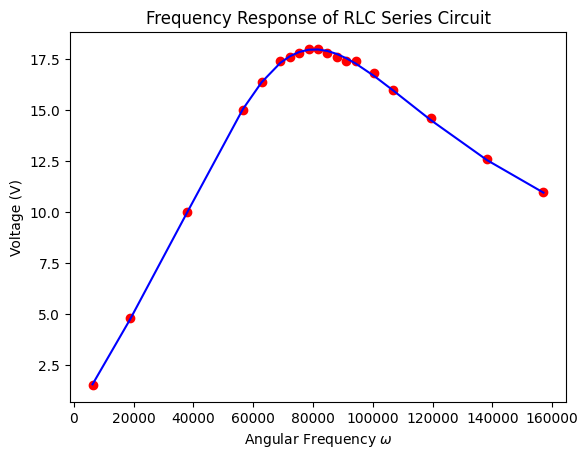

In [7]:
plt.figure()
plt.scatter(frequency,voltage,color='red',marker='o')
plt.plot(frequency,fit_model,color='blue')
plt.title('Frequency Response of RLC Series Circuit')
plt.xlabel('Angular Frequency $\omega$')
plt.ylabel('Voltage (V)')
plt.show()

In [8]:
print('resonance is {} +/- {}'.format(params[0],np.sqrt(covariance[0,0])))
print('gamma is {} +/- {}'.format(params[1],np.sqrt(covariance[1,1])))

resonance is -80540.85207337182 +/- 41.76479849636168
gamma is 88922.86039414011 +/- 30.25042766393457


In [9]:
chisq = sum((voltage-fit_model)**2/errors**2)
ndf = len(frequency)-len(params)

print('chisq is ',chisq)
print('p-value is ',1.-stats.chi2.cdf(chisq,df=ndf))

chisq is  318.06378707839906
p-value is  0.0


In [10]:
sig_gam = np.sqrt(covariance[1,1])
R = 0.015*params[1]
sig_R = 0.015*sig_gam
print('R is {} +/- {}'.format(R,sig_R))

R is 1333.8429059121015 +/- 0.45375641495901853


In [12]:
res = 2*np.pi*220.4*1000
C = 1/(0.015*res**2)
sig_C = np.sqrt((-2/(0.015*res**2))**2*1000**2)
print('resonant frequency is {} +/- 1 kHz'.format(res/1000))
print('capacitance is {} +/- {}'.format(C,sig_C))

resonant frequency is 1384.8140417023808 +/- 1 kHz
capacitance is 3.476368642640676e-11 +/- 6.952737285281352e-08
